In [121]:
import pandas as pd
import mne
raw = mne.io.read_raw_edf(r'..\EEG\dataset\S001\S001R04.edf', preload=True)

print(raw.info)

Extracting EDF parameters from c:\Users\sanji\Desktop\EEG\dataset\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>


In [122]:
# Apply band-pass filter for the Alpha band (8-13 Hz)
raw_alpha = raw.copy().filter(8, 13, l_trans_bandwidth=1, h_trans_bandwidth=1, fir_design='firwin')

# Apply band-pass filter for the Beta band (13-30 Hz)
raw_beta = raw.copy().filter(13, 30, l_trans_bandwidth=1, h_trans_bandwidth=1, fir_design='firwin')
# Optionally, save the filtered data to new EDF files (if needed)
# raw_alpha.save('/mnt/data/S001R01_alpha.edf', overwrite=True)
# raw_beta.save('/mnt/data/S001R01_beta.edf', overwrite=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 529 samples (3.306 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


In [123]:
# Assuming 'raw' is your preloaded MNE-Python Raw object
data, times = raw[:, :]

# Correctly creating DataFrame for EEG data
df_data = pd.DataFrame(data.transpose(), columns=raw.ch_names)

# Correctly creating DataFrame for time points
# Note: Only a single column, so we name it 'Time'
df_times = pd.DataFrame(times, columns=['Time'])

# Display the first few rows of each DataFrame
print(df_data.head(5))  # Display the first few rows of EEG data
print(df_times.head(5))  # Display the first few time points

       Fc5.      Fc3.      Fc1.      Fcz.      Fc2.      Fc4.      Fc6.  \
0 -0.000005  0.000002  0.000037  0.000039  0.000030  0.000026 -0.000016   
1 -0.000012 -0.000024  0.000001 -0.000002 -0.000015 -0.000022 -0.000055   
2 -0.000077 -0.000078 -0.000059 -0.000065 -0.000063 -0.000055 -0.000067   
3 -0.000066 -0.000067 -0.000050 -0.000065 -0.000060 -0.000055 -0.000068   
4 -0.000045 -0.000055 -0.000033 -0.000053 -0.000054 -0.000063 -0.000083   

       C5..      C3..      C1..  ...      P8..      Po7.      Po3.      Poz.  \
0 -0.000014  0.000004  0.000018  ... -0.000021 -0.000008 -0.000035 -0.000045   
1 -0.000036 -0.000027 -0.000025  ... -0.000050 -0.000040 -0.000068 -0.000065   
2 -0.000088 -0.000071 -0.000065  ... -0.000017 -0.000022 -0.000050 -0.000035   
3 -0.000062 -0.000053 -0.000054  ... -0.000039 -0.000060 -0.000078 -0.000064   
4 -0.000052 -0.000050 -0.000053  ... -0.000044 -0.000055 -0.000070 -0.000054   

       Po4.      Po8.      O1..      Oz..      O2..      Iz..  
0 -0

In [124]:
print(raw.ch_names)

# Example renaming of channels to match the 'standard_1020' montage
# Example renaming of channels to match the 'standard_1020' montage
new_names = {
    'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6',
    'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6',
    'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6',
    'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2',
    'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8',
    'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8',
    'Ft7.': 'FT7', 'Ft8.': 'FT8',
    'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10',
    'Tp7.': 'TP7', 'Tp8.': 'TP8',
    'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
    'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8',
    'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 
    'Iz..': 'Iz'
}

raw.rename_channels(new_names)

['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\sanji\AppData\Local\Temp\ipykernel_10120\3452804603.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 64 components
Fitting ICA took 5.2s.


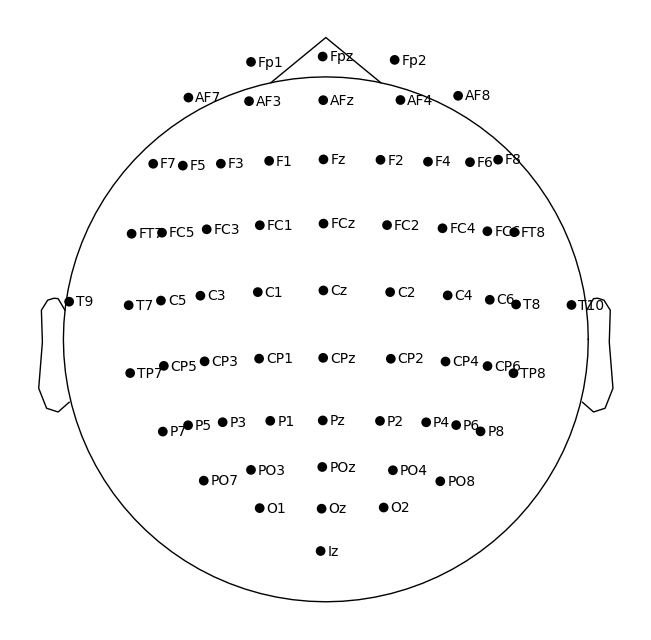

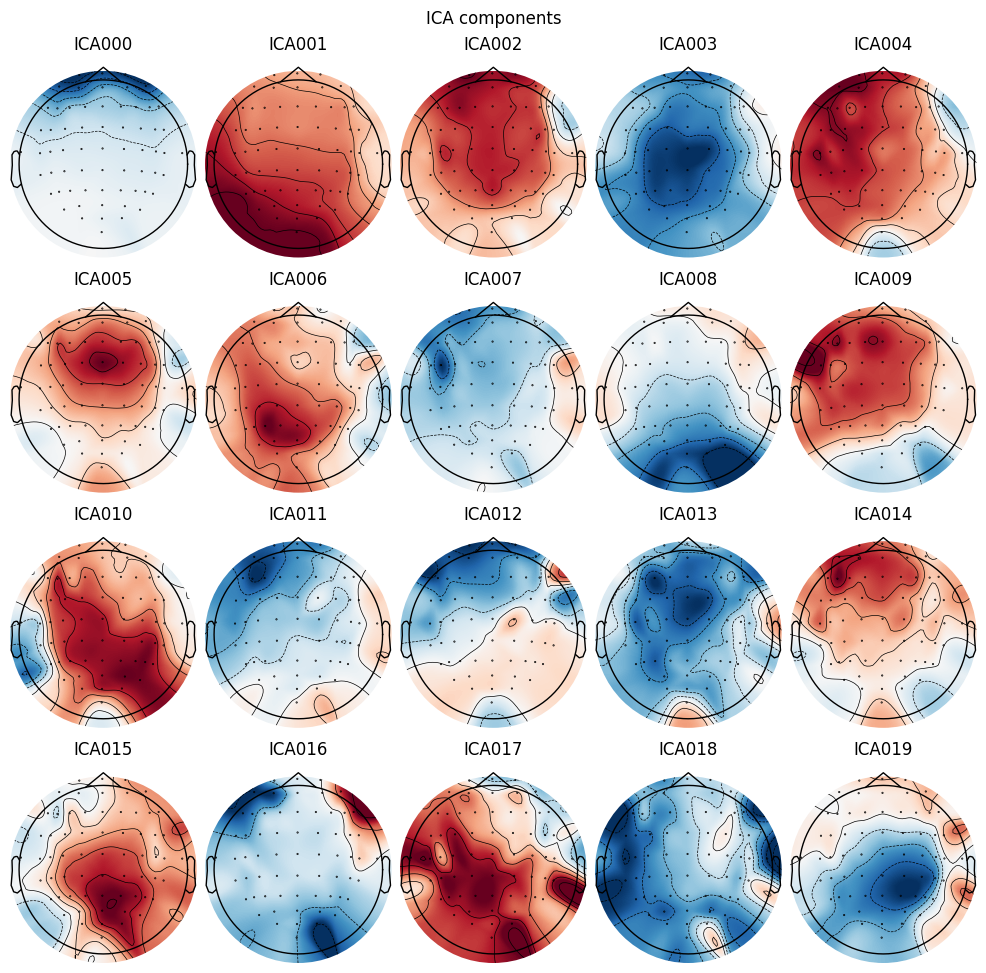

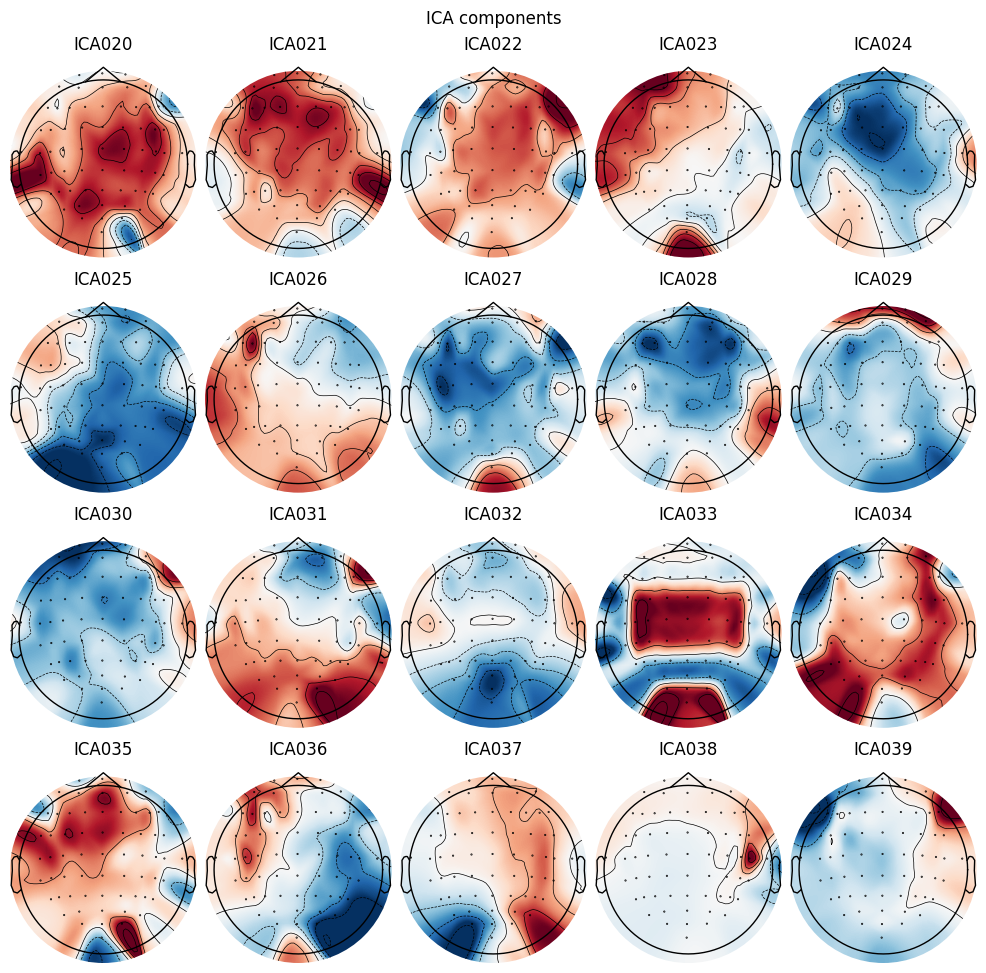

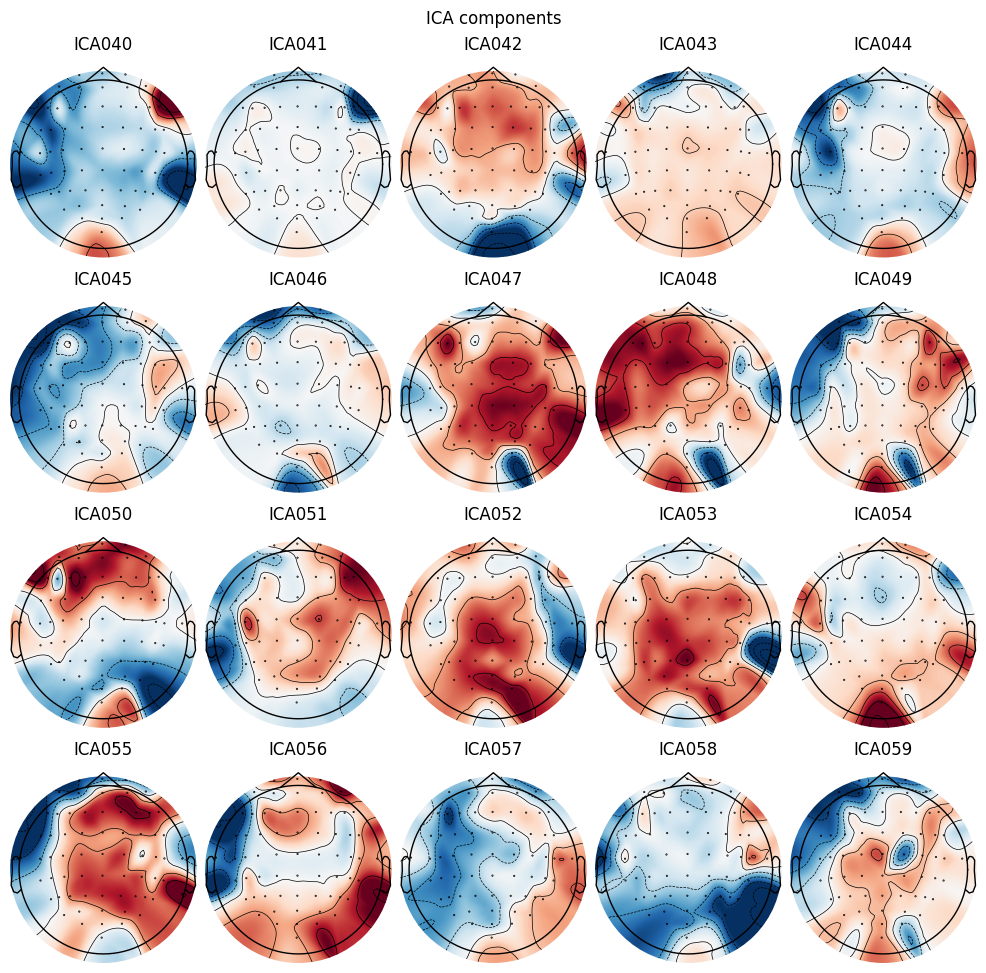

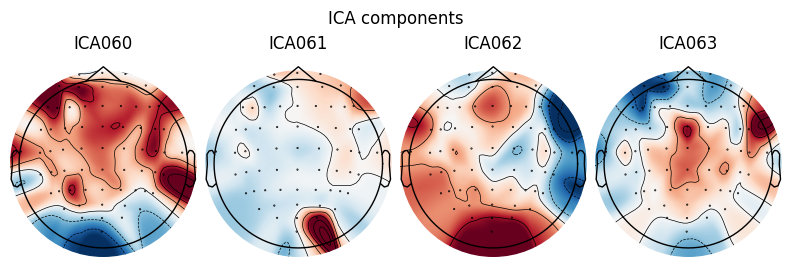

Applying ICA to Raw instance
    Transforming to ICA space (64 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

In [126]:
from mne.preprocessing import ICA
# Set up and fit the ICA
ica = ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(raw)

#Set the montage for the dataset
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

raw.plot_sensors(show_names=True)
# Plot the ICA components to visually identify artifact components
ica.plot_components()

# Once you've identified components that represent artifacts, you can exclude them
# Example: Assuming components 0 and 1 are artifacts
ica.exclude = [0, 1]

# Apply the ICA solution to the Raw data, effectively removing the artifacts
ica.apply(raw)

# Optional: Save the cleaned data to a new file
# raw.save('/mnt/data/S001R01_cleaned.edf', overwrite=True)

Filtering:

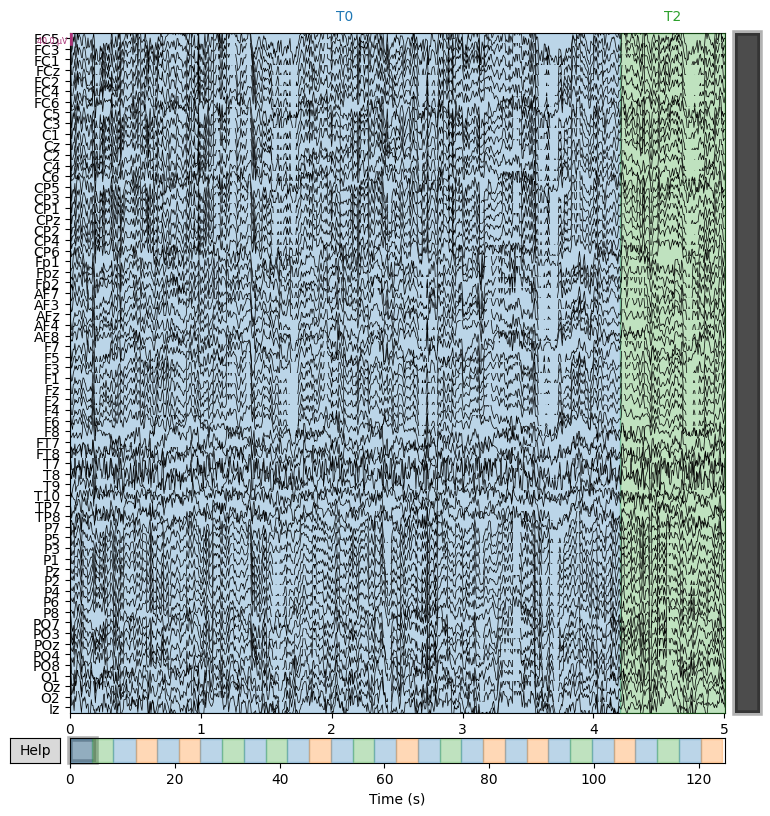

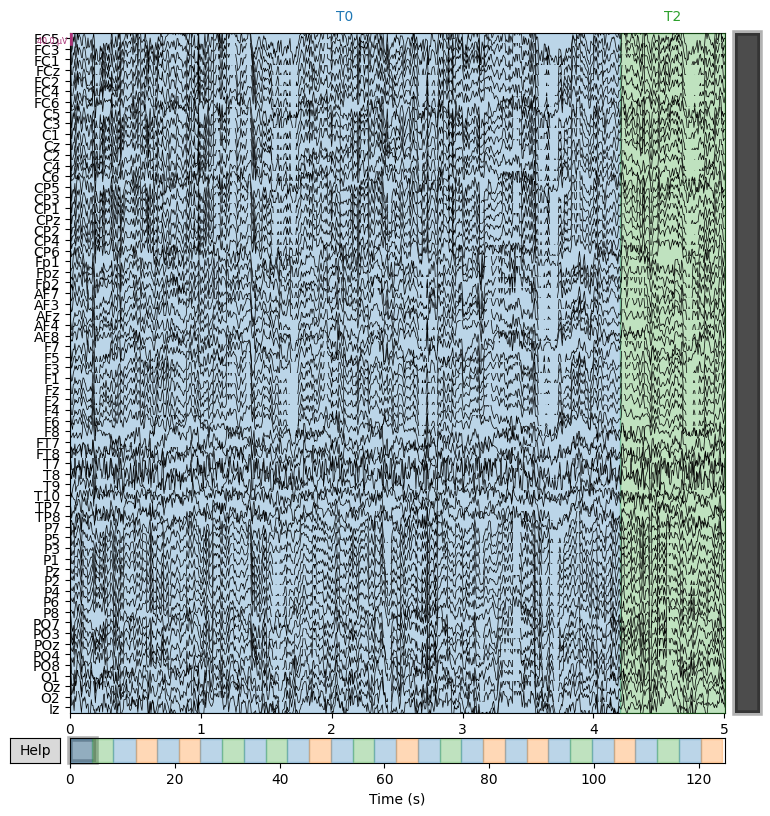

In [143]:
#raw.compute_psd(fmax=64).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=64)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components
Fitting ICA took 6.4s.


C:\Users\sanji\AppData\Local\Temp\ipykernel_10120\111348735.py:3: RuntimeWarning: Using n_components=64 (resulting in n_components_=64) may lead to an unstable mixing matrix estimation because the ratio between the largest (42) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 62
  ica.fit(raw)


[23, 60]
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated


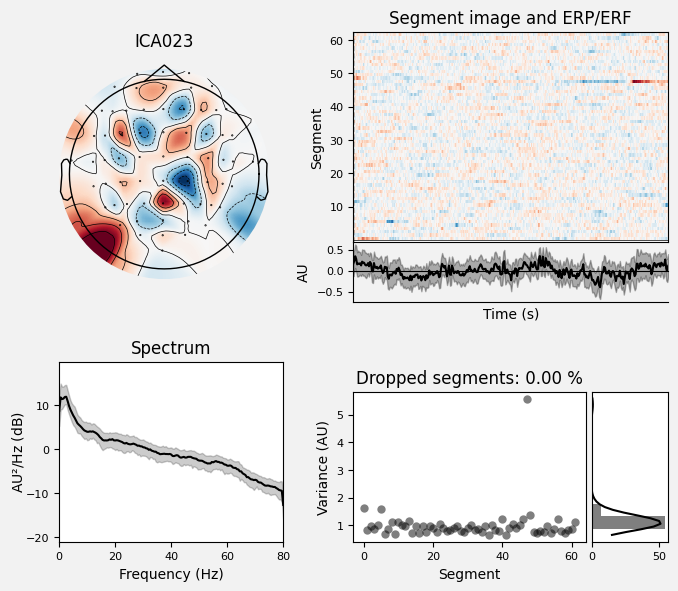

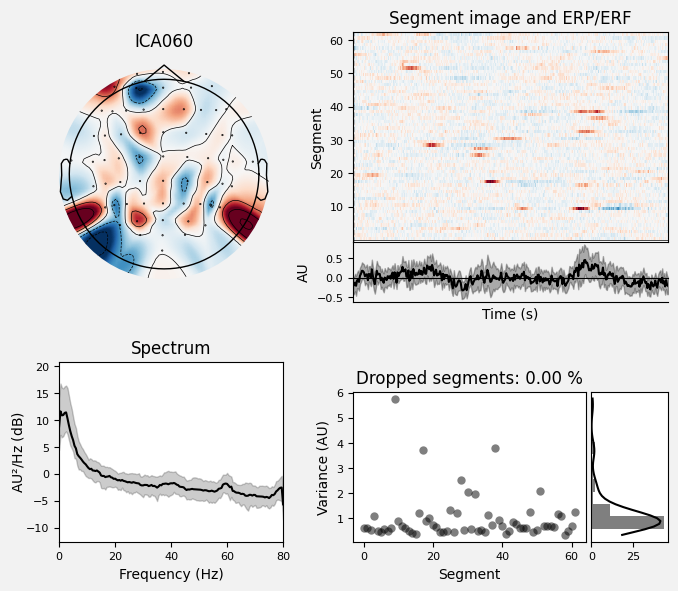

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [139]:

# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(raw)
# Define the channels of interest with their corresponding labels
channels_of_interest = ['Fp2', 'O1']

# Initialize a list to store the updated channel indexes
updated_channels_of_interest = []

# Loop through each channel label in channels_of_interest
for channel_label in channels_of_interest:
    # Get the index of the channel label in raw_cropped.ch_names
    channel_index = raw.ch_names.index(channel_label)
    # Append the index to the updated_channels_of_interest list
    updated_channels_of_interest.append(channel_index)

# Print the updated list
print(updated_channels_of_interest)


ica.plot_properties(raw, picks=updated_channels_of_interest)

Evoked responses

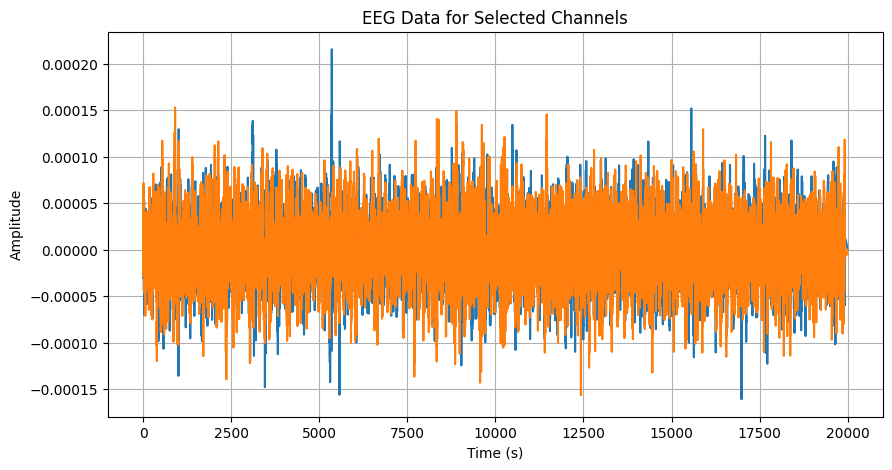

AttributeError: 'tuple' object has no attribute 'info'

In [160]:
raw_updated = raw[updated_channels_of_interest]  # This returns a tuple
import matplotlib.pyplot as plt
from mne.viz import plot_raw

# Extract the data from the tuple
data, _ = raw_updated

# Plot EEG data using Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(data.T)  # Transpose the data for correct plotting
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data for Selected Channels')
plt.grid(True)
plt.show()

# Alternatively, you can use MNE's plot_raw function
plot_raw(raw_updated, duration=5)


Detecting experimental events

In [161]:
events = mne.find_events(raw, stim_channel="STI 014")
print(events[:5])  # show the first 5

C:\Users\sanji\AppData\Local\Temp\ipykernel_10120\695840421.py:1: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in an error because the following channel names are missing:
['STI 014']
Either fix your included names or explicitly pass ordered=False.
  events = mne.find_events(raw, stim_channel="STI 014")


ValueError: No stim channel found to extract event triggers.